Data Extraction

In [2]:
pip install fredapi

Note: you may need to restart the kernel to use updated packages.


In [3]:
from fredapi import Fred
import pandas as pd
import numpy as np
fred = Fred(api_key='15239f57043248d46a380db5710b0e65')

#US Unemployment Rate Seasonally Adjusted
unrate_sa = fred.get_series('UNRATE')
#US Unemployment Rate Not Seasonally Adjusted
unrate_nsa = fred.get_series('UNRATENSA')
#The reason we need both is because the race series are not seasonally adjusted

In [4]:
#US Unemployment Rate - Women Seasonally Adjusted
women = fred.get_series('LNS14000002')
#US Unemployment Rate - Men Seasonally Adjusted
men = fred.get_series('LNS14000001')

In [5]:
#US Unemployment Rate - Black/African American Not Seasonally Adjusted
black = fred.get_series('LNU04000006')
#US Unemployment Rate - Hispanic Not Seasonally Adjusted
hispanic = fred.get_series('LNU04000009')
#US Unemployment Rate - White Not Seasonally Adjusted
white = fred.get_series('LNU04000003')

In [6]:
#Release is State Employment and Unemployment
release = fred.search_by_release(112)
#Cutting down to only Unemployment Rate data
release = release[release['title'].str.startswith('Unemployment Rate')]
#Getting rid of erraneous entries that aren't specifically the 50 states
release = release[~release['title'].str.endswith('Region')]
release = release[~release['title'].str.endswith('Division')]
release = release[~release['title'].str.endswith('division')]
release = release[~release['title'].str.endswith('(DISCONTINUED)')]
release = release[~release['title'].str.endswith('District of Columbia')]
release = release[~release['title'].str.endswith('Puerto Rico')]

#Cutting all Not Seasonally Adjusted Series
states = release[release['seasonal_adjustment'].str.startswith('Seasonally')]

In [7]:
states

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
AKUR,AKUR,2024-12-04,2024-12-04,Unemployment Rate in Alaska,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:08-06:00,25,None
ALUR,ALUR,2024-12-04,2024-12-04,Unemployment Rate in Alabama,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:04-06:00,38,None
ARUR,ARUR,2024-12-04,2024-12-04,Unemployment Rate in Arkansas,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:11-06:00,27,None
AZUR,AZUR,2024-12-04,2024-12-04,Unemployment Rate in Arizona,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:06-06:00,33,None
CAUR,CAUR,2024-12-04,2024-12-04,Unemployment Rate in California,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:02-06:00,64,None
COUR,COUR,2024-12-04,2024-12-04,Unemployment Rate in Colorado,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:06-06:00,34,None
CTUR,CTUR,2024-12-04,2024-12-04,Unemployment Rate in Connecticut,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:14-06:00,19,None
DEUR,DEUR,2024-12-04,2024-12-04,Unemployment Rate in Delaware,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:13-06:00,16,None
FLUR,FLUR,2024-12-04,2024-12-04,Unemployment Rate in Florida,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:03-06:00,51,None


In [8]:
dict = {}
#Going through the Dataframe to get all the series ids
for state in states['id']:
    dict[state[0:2]]=fred.get_series(states['id'][state])
#Building a new DataFrame with all the data we need
states_df = pd.DataFrame(dict)

In [9]:
states_df

,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1976-01-01,7.1,6.6,7.3,10.2,9.2,5.8,9.8,8.0,9.7,8.4,...,3.3,6.0,5.8,5.8,6.1,8.6,8.5,5.8,7.5,4.1
1976-02-01,7.1,6.6,7.3,10.2,9.2,5.7,9.8,8.0,9.7,8.4,...,3.3,6.0,5.8,5.9,6.1,8.6,8.5,5.8,7.5,4.1
1976-03-01,7.0,6.6,7.3,10.1,9.1,5.7,9.8,8.0,9.6,8.4,...,3.2,6.0,5.9,5.8,6.1,8.6,8.4,5.7,7.5,4.1
1976-04-01,6.9,6.5,7.2,10.0,9.1,5.6,9.6,8.1,9.5,8.3,...,3.1,6.0,5.9,5.8,6.0,8.6,8.5,5.6,7.5,4.0
1976-05-01,6.9,6.4,7.1,9.8,9.0,5.6,9.4,8.3,9.3,8.1,...,3.1,5.9,5.9,5.7,5.9,8.5,8.5,5.5,7.4,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-01,4.5,2.9,3.3,3.3,5.2,3.8,3.9,4.0,3.3,3.3,...,2.0,3.0,4.0,3.0,2.7,2.1,4.8,2.9,4.1,2.9
2024-07-01,4.5,2.8,3.3,3.4,5.2,3.9,3.6,4.1,3.3,3.4,...,2.0,3.0,4.1,3.2,2.7,2.1,4.9,3.0,4.2,2.9
2024-08-01,4.6,2.8,3.3,3.4,5.3,4.0,3.4,4.2,3.3,3.6,...,2.0,3.1,4.1,3.3,2.8,2.2,4.8,2.9,4.2,3.0
2024-09-01,4.5,2.9,3.3,3.5,5.3,4.0,3.2,4.2,3.3,3.6,...,2.0,3.2,4.1,3.5,2.9,2.2,4.8,2.9,4.2,3.1


Statistical Analysis

In [11]:
from scipy import stats

print(stats.shapiro(unrate_sa))
print(stats.shapiro(unrate_nsa))

ShapiroResult(statistic=0.9544867061302108, pvalue=2.674176321228506e-16)
ShapiroResult(statistic=0.9606940769845876, pvalue=4.916251071884864e-15)


We can conclude that the unemployment rates are probably not normally distributed, therefore we cannot use tests that assume a normal distribution. We will instead proceed with using the Kruskal-Wallis H Test and Mann-Whitney U Test

Discriminating Factors: Gender

In [14]:
print(stats.kruskal(unrate_sa, women, men))
print(stats.mannwhitneyu(women,men))

KruskalResult(statistic=36.890619725634984, pvalue=9.756717031619657e-09)
MannwhitneyuResult(statistic=492721.0, pvalue=3.199753170827141e-09)


These tests suggest that there is a significant difference between the unemployment rates for men and women in the US overall since 1948

In [16]:
df_gen = pd.concat([unrate_sa, women, men], axis=1)
df_gen.columns = ['Unemployment Rate', 'Unemployment Rate - Women', 'Unemployment Rate - Men']

<BarContainer object of 3 artists>

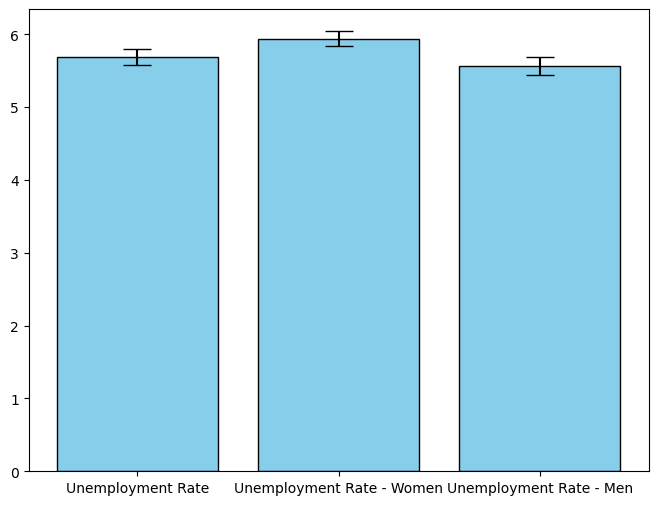

In [17]:
import matplotlib.pyplot as plt

def compute_ci(data, confidence=0.95):
    mean = np.mean(data)
    sem = stats.sem(data) 
    h = sem * stats.t.ppf((1 + confidence) / 2., len(data)-1)
    return mean, mean - h, mean + h

means = []
ci_lower = []
ci_upper = []

for ur in df_gen.columns:
    mean, lower, upper = compute_ci(df_gen[ur])
    means.append(mean)
    ci_lower.append(lower)
    ci_upper.append(upper)

plt.figure(figsize=(8, 6))
plt.bar(df_gen.columns, means, yerr=[np.array(means) - np.array(ci_lower), np.array(ci_upper) - np.array(means)],
        capsize=10, color='skyblue', edgecolor='black')

<BarContainer object of 3 artists>

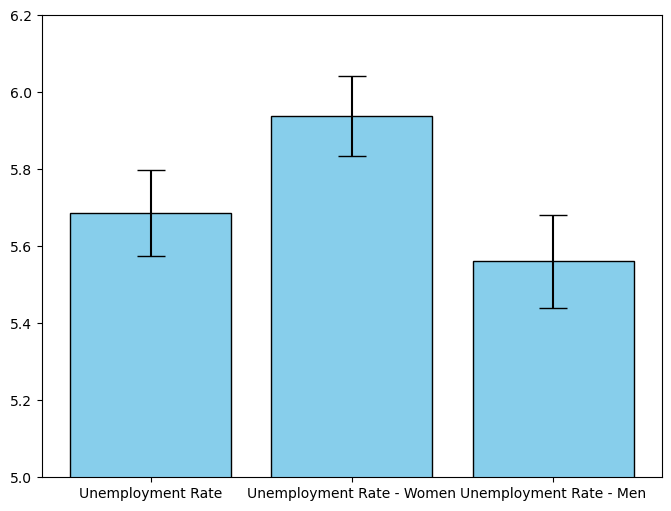

In [18]:
plt.figure(figsize=(8, 6))
plt.ylim(5,6.2)
plt.bar(df_gen.columns, means, yerr=[np.array(means) - np.array(ci_lower), np.array(ci_upper) - np.array(means)],
        capsize=10, color='skyblue', edgecolor='black')

Discriminating Factors: Race

In [20]:
print(stats.kruskal(unrate_nsa, black, hispanic, white))
print(stats.mannwhitneyu(black,hispanic))
print(stats.mannwhitneyu(black,white))
print(stats.mannwhitneyu(hispanic,white))

KruskalResult(statistic=1502.7047225145973, pvalue=0.0)
MannwhitneyuResult(statistic=293437.5, pvalue=1.323176102386586e-51)
MannwhitneyuResult(statistic=519235.5, pvalue=1.699159477613359e-205)
MannwhitneyuResult(statistic=454900.5, pvalue=2.28280301370051e-125)


These results suggest there are clear differences between the unemployment rates for races in the US since 1972

In [22]:
df_race = pd.concat([unrate_nsa, black, hispanic, white], axis=1)
df_race.columns = ['Unemployment Rate', 'Unemployment Rate - Black', 'Unemployment Rate - Hispanic', 'Unemployment Rate - White']
df_race = df_race.dropna()

<BarContainer object of 4 artists>

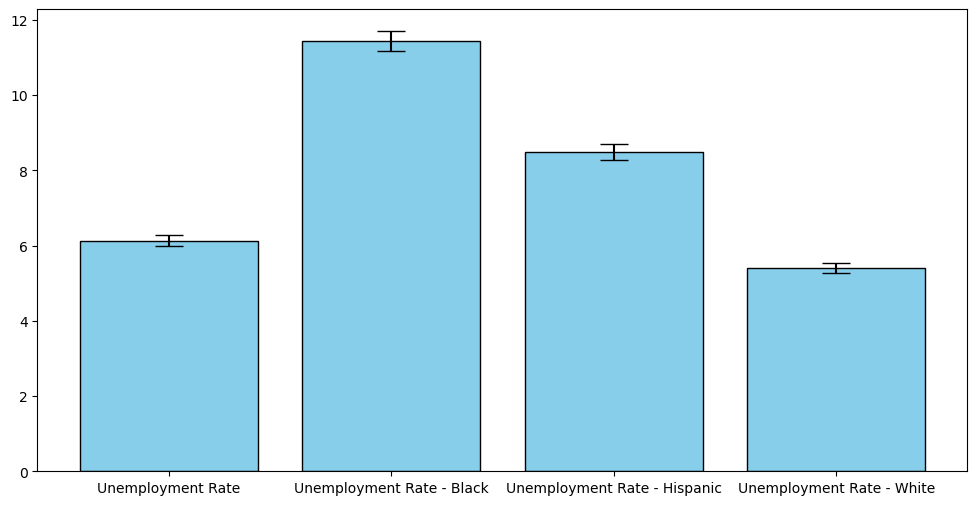

In [23]:
means = []
ci_lower = []
ci_upper = []

for ur in df_race.columns:
    mean, lower, upper = compute_ci(df_race[ur])
    means.append(mean)
    ci_lower.append(lower)
    ci_upper.append(upper)

plt.figure(figsize=(12, 6))
plt.bar(df_race.columns, means, yerr=[np.array(means) - np.array(ci_lower), np.array(ci_upper) - np.array(means)],
        capsize=10, color='skyblue', edgecolor='black')

<BarContainer object of 4 artists>

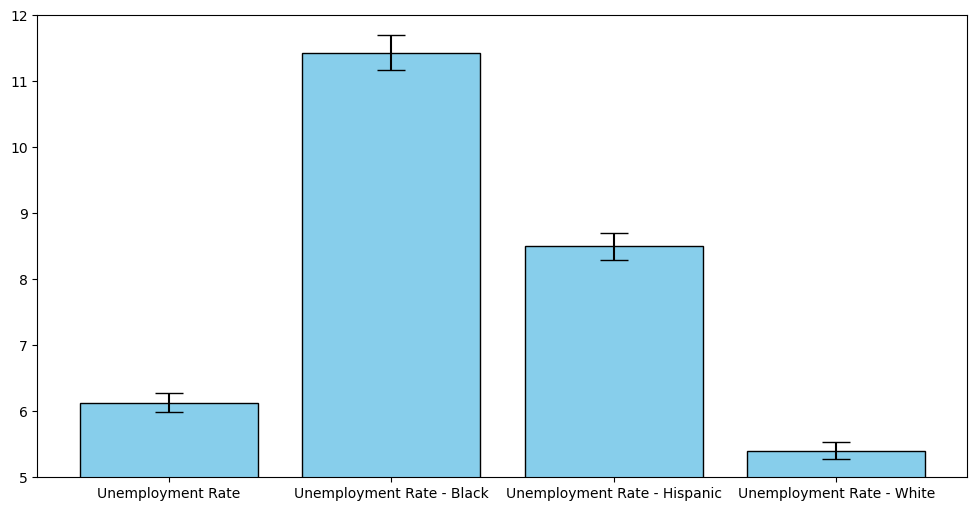

In [24]:
plt.figure(figsize=(12, 6))
plt.ylim(5,12)
plt.bar(df_race.columns, means, yerr=[np.array(means) - np.array(ci_lower), np.array(ci_upper) - np.array(means)],
        capsize=10, color='skyblue', edgecolor='black')

In [25]:
ur_m = np.array([])
ur_s = np.array([])
urw_m = np.array([])
urw_s = np.array([])
urm_m = np.array([])
urm_s = np.array([])

#Gathering mean and standard deviation for each year
for i in range(1948,2025):
    ur = df_gen[df_gen.index.year==i]['Unemployment Rate']
    urw = df_gen[df_gen.index.year==i]['Unemployment Rate - Women']
    urm = df_gen[df_gen.index.year==i]['Unemployment Rate - Men']
    ur_m = np.append(ur_m,ur.mean())
    ur_s = np.append(ur_s,ur.std())
    urw_m = np.append(urw_m,urw.mean())
    urw_s = np.append(urw_s,urw.std())
    urm_m = np.append(urm_m,urm.mean())
    urm_s = np.append(urm_s,urm.std())

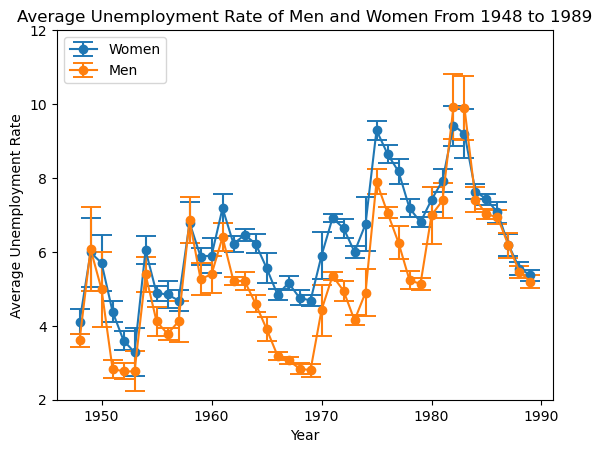

In [26]:
fig, ax = plt.subplots()

years = np.arange(1948,1990)

#ax.errorbar(years,ur_m[0:len(years)],yerr=ur_s[0:len(years)],fmt='-o',solid_capstyle='projecting', capsize=7, capthick =1.4, label='UR')
ax.errorbar(years,urw_m[0:len(years)],yerr=urw_s[0:len(years)],fmt='-o',solid_capstyle='projecting', capsize=7, capthick =1.4, label='Women')
ax.errorbar(years,urm_m[0:len(years)],yerr=urm_s[0:len(years)],fmt='-o',solid_capstyle='projecting', capsize=7, capthick =1.4, label='Men')

plt.ylim(2,12)
ax.set_title('Average Unemployment Rate of Men and Women From 1948 to 1989')
ax.set_ylabel('Average Unemployment Rate')
ax.set_xlabel("Year")

ax.legend(loc="upper left")
plt.show()

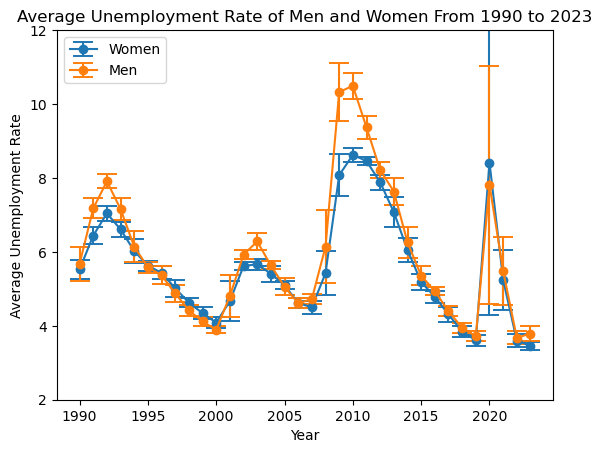

In [27]:
fig, ax = plt.subplots()

years = np.arange(1990,2024)

#ax.errorbar(years,ur_m[0:len(years)],yerr=ur_s[0:len(years)],fmt='-o',solid_capstyle='projecting', capsize=7, capthick =1.4, label='UR')
ax.errorbar(years,urw_m[42:-1],yerr=urw_s[42:-1],fmt='-o',solid_capstyle='projecting', capsize=7, capthick =1.4, label='Women')
ax.errorbar(years,urm_m[42:-1],yerr=urm_s[42:-1],fmt='-o',solid_capstyle='projecting', capsize=7, capthick =1.4, label='Men')

plt.ylim(2,12)
ax.set_title('Average Unemployment Rate of Men and Women From 1990 to 2023')
ax.set_ylabel('Average Unemployment Rate')
ax.set_xlabel("Year")

ax.legend(loc="upper left")
plt.show()

In [28]:
urbl_m = np.array([])
urbl_s = np.array([])
urhi_m = np.array([])
urhi_s = np.array([])
urwh_m = np.array([])
urwh_s = np.array([])

for i in range(1972,2025):
    urbl = df_race[df_race.index.year==i]['Unemployment Rate - Black']
    urhi = df_race[df_race.index.year==i]['Unemployment Rate - Hispanic']
    urwh = df_race[df_race.index.year==i]['Unemployment Rate - White']
    urbl_m = np.append(urbl_m,urbl.mean())
    urbl_s = np.append(urbl_s,urbl.std())
    urhi_m = np.append(urhi_m,urhi.mean())
    urhi_s = np.append(urhi_s,urhi.std())
    urwh_m = np.append(urwh_m,urwh.mean())
    urwh_s = np.append(urwh_s,urwh.std())

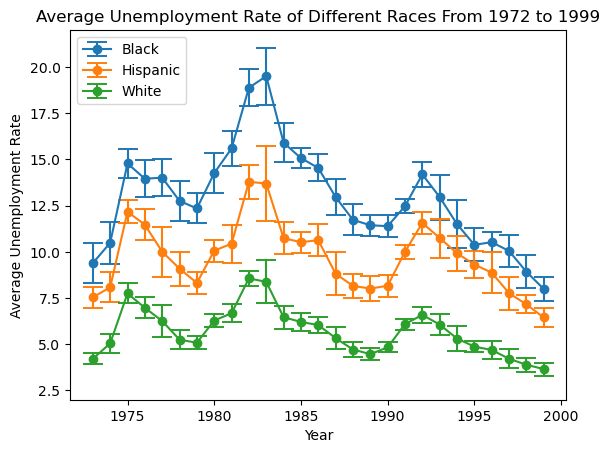

In [29]:
fig, ax = plt.subplots()

years = np.arange(1972,2000)

ax.errorbar(years,urbl_m[0:len(years)],yerr=urbl_s[0:len(years)],fmt='-o',solid_capstyle='projecting', capsize=7, capthick =1.4, label='Black')
ax.errorbar(years,urhi_m[0:len(years)],yerr=urhi_s[0:len(years)],fmt='-o',solid_capstyle='projecting', capsize=7, capthick =1.4, label='Hispanic')
ax.errorbar(years,urwh_m[0:len(years)],yerr=urwh_s[0:len(years)],fmt='-o',solid_capstyle='projecting', capsize=7, capthick =1.4, label='White')

plt.ylim(2,22)
ax.set_title('Average Unemployment Rate of Different Races From 1972 to 1999')
ax.set_ylabel('Average Unemployment Rate')
ax.set_xlabel("Year")

ax.legend(loc="upper left")
plt.show()

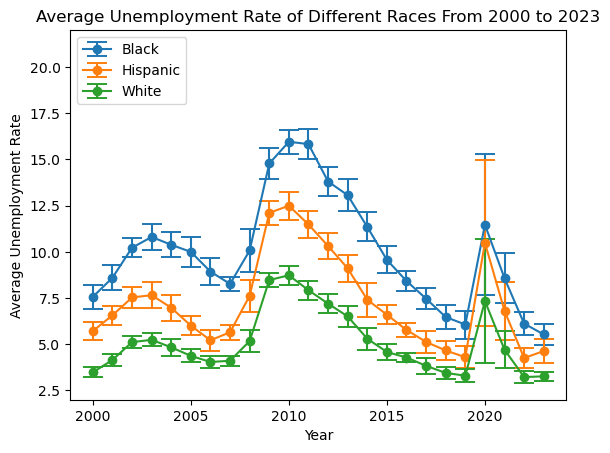

In [30]:
fig, ax = plt.subplots()

years = np.arange(2000,2024)

ax.errorbar(years,urbl_m[28:-1],yerr=urbl_s[28:-1],fmt='-o',solid_capstyle='projecting', capsize=7, capthick =1.4, label='Black')
ax.errorbar(years,urhi_m[28:-1],yerr=urhi_s[28:-1],fmt='-o',solid_capstyle='projecting', capsize=7, capthick =1.4, label='Hispanic')
ax.errorbar(years,urwh_m[28:-1],yerr=urwh_s[28:-1],fmt='-o',solid_capstyle='projecting', capsize=7, capthick =1.4, label='White')

plt.ylim(2,22)
ax.set_title('Average Unemployment Rate of Different Races From 2000 to 2023')
ax.set_ylabel('Average Unemployment Rate')
ax.set_xlabel("Year")

ax.legend(loc="upper left")
plt.show()

Data Visulization

In [32]:
states_df

,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1976-01-01,7.1,6.6,7.3,10.2,9.2,5.8,9.8,8.0,9.7,8.4,...,3.3,6.0,5.8,5.8,6.1,8.6,8.5,5.8,7.5,4.1
1976-02-01,7.1,6.6,7.3,10.2,9.2,5.7,9.8,8.0,9.7,8.4,...,3.3,6.0,5.8,5.9,6.1,8.6,8.5,5.8,7.5,4.1
1976-03-01,7.0,6.6,7.3,10.1,9.1,5.7,9.8,8.0,9.6,8.4,...,3.2,6.0,5.9,5.8,6.1,8.6,8.4,5.7,7.5,4.1
1976-04-01,6.9,6.5,7.2,10.0,9.1,5.6,9.6,8.1,9.5,8.3,...,3.1,6.0,5.9,5.8,6.0,8.6,8.5,5.6,7.5,4.0
1976-05-01,6.9,6.4,7.1,9.8,9.0,5.6,9.4,8.3,9.3,8.1,...,3.1,5.9,5.9,5.7,5.9,8.5,8.5,5.5,7.4,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-01,4.5,2.9,3.3,3.3,5.2,3.8,3.9,4.0,3.3,3.3,...,2.0,3.0,4.0,3.0,2.7,2.1,4.8,2.9,4.1,2.9
2024-07-01,4.5,2.8,3.3,3.4,5.2,3.9,3.6,4.1,3.3,3.4,...,2.0,3.0,4.1,3.2,2.7,2.1,4.9,3.0,4.2,2.9
2024-08-01,4.6,2.8,3.3,3.4,5.3,4.0,3.4,4.2,3.3,3.6,...,2.0,3.1,4.1,3.3,2.8,2.2,4.8,2.9,4.2,3.0
2024-09-01,4.5,2.9,3.3,3.5,5.3,4.0,3.2,4.2,3.3,3.6,...,2.0,3.2,4.1,3.5,2.9,2.2,4.8,2.9,4.2,3.1


In [33]:

# converting the index datatype to datetime to extract the year 
states_df.index = pd.to_datetime(states_df.index)


# Creating a new column year by extracting year from index (date time )
states_df["Year"] = states_df.index.year

In [34]:
# the new column will be visible at the end
states_df 


,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,Year
1976-01-01,7.1,6.6,7.3,10.2,9.2,5.8,9.8,8.0,9.7,8.4,...,6.0,5.8,5.8,6.1,8.6,8.5,5.8,7.5,4.1,1976
1976-02-01,7.1,6.6,7.3,10.2,9.2,5.7,9.8,8.0,9.7,8.4,...,6.0,5.8,5.9,6.1,8.6,8.5,5.8,7.5,4.1,1976
1976-03-01,7.0,6.6,7.3,10.1,9.1,5.7,9.8,8.0,9.6,8.4,...,6.0,5.9,5.8,6.1,8.6,8.4,5.7,7.5,4.1,1976
1976-04-01,6.9,6.5,7.2,10.0,9.1,5.6,9.6,8.1,9.5,8.3,...,6.0,5.9,5.8,6.0,8.6,8.5,5.6,7.5,4.0,1976
1976-05-01,6.9,6.4,7.1,9.8,9.0,5.6,9.4,8.3,9.3,8.1,...,5.9,5.9,5.7,5.9,8.5,8.5,5.5,7.4,3.9,1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-01,4.5,2.9,3.3,3.3,5.2,3.8,3.9,4.0,3.3,3.3,...,3.0,4.0,3.0,2.7,2.1,4.8,2.9,4.1,2.9,2024
2024-07-01,4.5,2.8,3.3,3.4,5.2,3.9,3.6,4.1,3.3,3.4,...,3.0,4.1,3.2,2.7,2.1,4.9,3.0,4.2,2.9,2024
2024-08-01,4.6,2.8,3.3,3.4,5.3,4.0,3.4,4.2,3.3,3.6,...,3.1,4.1,3.3,2.8,2.2,4.8,2.9,4.2,3.0,2024
2024-09-01,4.5,2.9,3.3,3.5,5.3,4.0,3.2,4.2,3.3,3.6,...,3.2,4.1,3.5,2.9,2.2,4.8,2.9,4.2,3.1,2024


In [35]:
# dropping the index column as we wont need it anymore 


states_df_reset = states_df.reset_index(drop=True)

In [36]:
states_df_reset

,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,Year
0,7.1,6.6,7.3,10.2,9.2,5.8,9.8,8.0,9.7,8.4,...,6.0,5.8,5.8,6.1,8.6,8.5,5.8,7.5,4.1,1976
1,7.1,6.6,7.3,10.2,9.2,5.7,9.8,8.0,9.7,8.4,...,6.0,5.8,5.9,6.1,8.6,8.5,5.8,7.5,4.1,1976
2,7.0,6.6,7.3,10.1,9.1,5.7,9.8,8.0,9.6,8.4,...,6.0,5.9,5.8,6.1,8.6,8.4,5.7,7.5,4.1,1976
3,6.9,6.5,7.2,10.0,9.1,5.6,9.6,8.1,9.5,8.3,...,6.0,5.9,5.8,6.0,8.6,8.5,5.6,7.5,4.0,1976
4,6.9,6.4,7.1,9.8,9.0,5.6,9.4,8.3,9.3,8.1,...,5.9,5.9,5.7,5.9,8.5,8.5,5.5,7.4,3.9,1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,4.5,2.9,3.3,3.3,5.2,3.8,3.9,4.0,3.3,3.3,...,3.0,4.0,3.0,2.7,2.1,4.8,2.9,4.1,2.9,2024
582,4.5,2.8,3.3,3.4,5.2,3.9,3.6,4.1,3.3,3.4,...,3.0,4.1,3.2,2.7,2.1,4.9,3.0,4.2,2.9,2024
583,4.6,2.8,3.3,3.4,5.3,4.0,3.4,4.2,3.3,3.6,...,3.1,4.1,3.3,2.8,2.2,4.8,2.9,4.2,3.0,2024
584,4.5,2.9,3.3,3.5,5.3,4.0,3.2,4.2,3.3,3.6,...,3.2,4.1,3.5,2.9,2.2,4.8,2.9,4.2,3.1,2024


In [37]:
# Taking the year column at the first position

states_df_reset = states_df_reset[['Year','AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'IA',
       'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
       'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK',
       'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI',
       'WV', 'WY']] 

In [38]:
states_df_reset

,Year,AK,AL,AR,AZ,CA,CO,CT,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,1976,7.1,6.6,7.3,10.2,9.2,5.8,9.8,8.0,9.7,...,3.3,6.0,5.8,5.8,6.1,8.6,8.5,5.8,7.5,4.1
1,1976,7.1,6.6,7.3,10.2,9.2,5.7,9.8,8.0,9.7,...,3.3,6.0,5.8,5.9,6.1,8.6,8.5,5.8,7.5,4.1
2,1976,7.0,6.6,7.3,10.1,9.1,5.7,9.8,8.0,9.6,...,3.2,6.0,5.9,5.8,6.1,8.6,8.4,5.7,7.5,4.1
3,1976,6.9,6.5,7.2,10.0,9.1,5.6,9.6,8.1,9.5,...,3.1,6.0,5.9,5.8,6.0,8.6,8.5,5.6,7.5,4.0
4,1976,6.9,6.4,7.1,9.8,9.0,5.6,9.4,8.3,9.3,...,3.1,5.9,5.9,5.7,5.9,8.5,8.5,5.5,7.4,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,2024,4.5,2.9,3.3,3.3,5.2,3.8,3.9,4.0,3.3,...,2.0,3.0,4.0,3.0,2.7,2.1,4.8,2.9,4.1,2.9
582,2024,4.5,2.8,3.3,3.4,5.2,3.9,3.6,4.1,3.3,...,2.0,3.0,4.1,3.2,2.7,2.1,4.9,3.0,4.2,2.9
583,2024,4.6,2.8,3.3,3.4,5.3,4.0,3.4,4.2,3.3,...,2.0,3.1,4.1,3.3,2.8,2.2,4.8,2.9,4.2,3.0
584,2024,4.5,2.9,3.3,3.5,5.3,4.0,3.2,4.2,3.3,...,2.0,3.2,4.1,3.5,2.9,2.2,4.8,2.9,4.2,3.1


In [39]:
# taking mean year wise for all the states
mean_state_wise = states_df_reset.groupby('Year').mean()

In [40]:
mean_state_wise

,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Year,,,,,,,,,,,,,,,,,,,,,
1976,7.566667,6.700000,6.916667,9.758333,9.150000,5.916667,9.175000,8.600000,9.300000,8.158333,...,3.316667,6.100000,5.816667,5.608333,5.866667,8.258333,8.783333,5.508333,7.225000,3.858333
1977,9.891667,7.150000,6.475000,8.400000,8.391667,6.350000,6.991667,8.183333,8.275000,6.933333,...,3.375000,6.266667,5.433333,5.208333,5.450000,7.008333,8.375000,5.058333,6.916667,3.241667
1978,10.633333,6.408333,6.225000,5.950000,7.133333,5.558333,5.291667,7.075000,6.758333,5.691667,...,3.158333,5.841667,4.866667,3.866667,5.275000,5.658333,6.808333,4.866667,6.341667,2.858333
1979,9.058333,7.225000,6.283333,5.075000,6.216667,4.616667,5.083333,6.975000,5.991667,5.133333,...,3.358333,5.858333,4.416667,4.400000,4.725000,4.983333,6.791667,4.533333,7.325000,2.533333
1980,9.533333,8.816667,7.533333,6.608333,6.900000,5.883333,5.666667,7.516667,5.983333,6.308333,...,4.716667,7.225000,5.250000,6.275000,5.108333,5.933333,7.925000,7.366667,10.133333,3.825000
1981,9.183333,10.691667,8.600000,6.191667,7.433333,5.641667,6.200000,7.783333,6.800000,6.450000,...,4.808333,8.900000,5.350000,6.650000,5.941667,5.850000,9.325000,7.816667,10.591667,4.150000
1982,10.058333,13.950000,9.466667,9.958333,10.058333,7.608333,6.858333,8.358333,8.483333,7.800000,...,5.425000,11.675000,6.900000,8.108333,7.408333,6.850000,11.633333,10.316667,14.041667,5.966667
1983,10.100000,13.816667,9.700000,9.108333,9.825000,7.116667,6.008333,7.900000,8.641667,7.641667,...,5.208333,11.650000,8.058333,9.016667,6.350000,6.541667,11.200000,9.766667,17.233333,7.958333
1984,9.891667,11.283333,8.533333,4.958333,7.758333,5.491667,4.650000,6.216667,6.591667,6.100000,...,4.366667,8.841667,6.158333,6.566667,5.066667,4.916667,9.316667,7.283333,14.091667,6.308333


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heat map for visulizing the state wise data by year

plt.figure(figsize=(100,100 ))
sns.heatmap(mean_state_wise, annot=True, cmap='YlGnBu')
plt.title('Mean Values by State and Year')
plt.xlabel('State')
plt.ylabel('Year')
plt.show()

In [42]:
# for creating a map we will use the transpose fucntion

mean_state_wise_map = mean_state_wise.T



In [43]:
# we can manually take any year here to visulize it on the map (change the iloc value)

T1 = mean_state_wise_map.iloc[:,1]

In [44]:
T1.columns = ['State', 'rate']

In [45]:
T1.columns

['State', 'rate']

In [46]:
T1

AK    9.891667
AL    7.150000
AR    6.475000
AZ    8.400000
CA    8.391667
CO    6.350000
CT    6.991667
DE    8.183333
FL    8.275000
GA    6.933333
HI    7.616667
IA    4.008333
ID    5.850000
IL    6.191667
IN    5.766667
KS    3.875000
KY    4.850000
LA    6.933333
MA    7.866667
MD    6.108333
ME    8.358333
MI    8.225000
MN    5.275000
MO    6.016667
MS    7.208333
MT    6.150000
NC    5.891667
ND    4.441667
NE    3.366667
NH    5.566667
NJ    9.283333
NM    7.733333
NV    6.766667
NY    9.166667
OH    6.458333
OK    4.766667
OR    7.433333
PA    7.741667
RI    8.041667
SC    6.733333
SD    3.375000
TN    6.266667
TX    5.433333
UT    5.208333
VA    5.450000
VT    7.008333
WA    8.375000
WI    5.058333
WV    6.916667
WY    3.241667
Name: 1977, dtype: float64

In [47]:
import folium


m = folium.Map(location=(45.5236, -122.6750))

In [48]:
import pandas
import requests

state_geo = requests.get(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json"
).json()

#state_data = pandas.read_csv(     "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_unemployment_oct_2012.csv" )

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=T1,
    columns=["State", "rate"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

m

GUI

In [50]:
# for visulizing it in GUI we will melt the dataframe so that it is easier for the visulization


temp_df = mean_state_wise.reset_index()

gui_df = temp_df.melt(id_vars=['Year'], var_name='State', value_name='Unemployment Rate')

# Displaying the melted dataframe

print(gui_df)

      Year State  Unemployment Rate
0     1976    AK           7.566667
1     1977    AK           9.891667
2     1978    AK          10.633333
3     1979    AK           9.058333
4     1980    AK           9.533333
...    ...   ...                ...
2445  2020    WY           5.858333
2446  2021    WY           4.541667
2447  2022    WY           3.416667
2448  2023    WY           2.916667
2449  2024    WY           2.920000

[2450 rows x 3 columns]


In [51]:
#importing the required libraries

import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

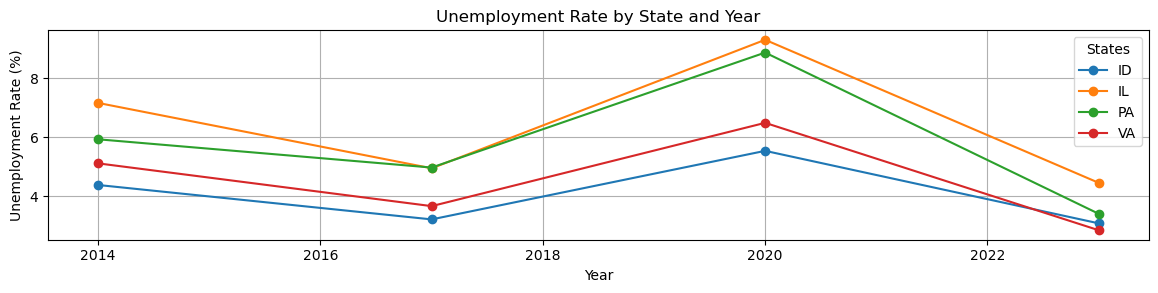

In [98]:
# extracting the sorted and unique list of years and states --> from the dataframe to be on the safer side 


years_list = sorted(gui_df['Year'].unique())
states_list = sorted(gui_df['State'].unique())


# For the creation of GUI we will use the Tkinter library
gui_window = tk.Tk()

# Giving a meaningful title to our Visualization

gui_window.title("Unemployment Rate Visualization by selecting years and states")

# creating checkbox frame to place the years and states boxes in the gui window

checkbox_gui_frame = ttk.Frame(gui_window)
checkbox_gui_frame.pack(padx=10, pady=10, fill='both', expand=True)

# Framing the plotting of graphs  

plot_gui_frame = ttk.Frame(gui_window)
plot_gui_frame.pack(padx=10, pady=10, fill='both', expand=True)

# Now to store the selected states and years we are creating new dictionarys to get input from checkboxes


checked_state = {}
checked_year = {}


# Now creating the checkboxes for the states first 

state_gui_label = ttk.Label(checkbox_gui_frame, text="Select States:")
state_gui_label.grid(row=0, column=0, padx=5, pady=5, sticky="w")


# Creation of checkmarks for each state

for i, j in enumerate(states_list):
    var = tk.BooleanVar()
    checked_state[j] = var
    checkbox = ttk.Checkbutton(checkbox_gui_frame, text=j, variable=var)
    checkbox.grid(row=(i // 3) + 1, column=(i % 3), padx=5, pady=5, sticky="w")

# Now creating the checkboxes for the years  

year_gui_label = ttk.Label(checkbox_gui_frame, text="Select Years:")
year_gui_label.grid(row=0, column=3, padx=5, pady=5, sticky="w")

# Creation of checkmarks for each year

for i, j in enumerate(years_list):
    var = tk.BooleanVar()
    checked_year[j] = var
    checkbox = ttk.Checkbutton(checkbox_gui_frame, text=str(j), variable=var)
    checkbox.grid(row=(i // 3) + 1, column=3 + (i % 3), padx=5, pady=5, sticky="w")

# Creating a function to plot the unemployement rate according to the selection done in the checkboxes

def plotting_unemployment():
    # extract the selected states and years
    states_marked_in_window = [state for state, var in checked_state.items() if var.get()]
    years_marked_in_window = [year for year, var in checked_year.items() if var.get()]

    # Filtering the dataframe based on selected states and years
    final_df = gui_df[gui_df['State'].isin(states_marked_in_window) & gui_df['Year'].isin(years_marked_in_window)]

    if final_df.empty:
        messagebox.showwarning("No Data", "No data available for the selected states and years.")
        return

    # Creation of graph
    
    plt.figure(figsize=(10, 6))
    
    # Visulizing the unemployment rates
    for state in states_marked_in_window:
        state_data = final_df[final_df['State'] == state]
        plt.plot(state_data['Year'], state_data['Unemployment Rate'], label=state, marker='o')

    # Making some changes to the graph setting
    plt.title('Unemployment Rate by State and Year')
    plt.xlabel('Year')
    plt.ylabel('Unemployment Rate (%)')
    plt.legend(title="States")
    plt.grid(True)

    # Drop the previous plot for new selection
    for widget in plot_gui_frame.winfo_children():
        widget.destroy()

    # Display the new graph in the GUI window
    canvas = FigureCanvasTkAgg(plt.gcf(), master=plot_gui_frame)
    canvas.get_tk_widget().pack(fill='both', expand=True)
    canvas.draw()

# Creation of button for execution of the window

plot_button = ttk.Button(checkbox_gui_frame, text="Create Visulisation of Unemployment Rate", command=plotting_unemployment)
plot_button.grid(row=len(states_list) // 3 + 2, column=0, columnspan=6, pady=10)

# Start the Tkinter main loop

gui_window.mainloop()
